<a href="https://colab.research.google.com/github/Daltonlbs/ColabProjects/blob/main/diff_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0

In [ ]:
import investpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
investpy.etfs.get_etfs(country='Brazil')

In [ ]:
data = investpy.get_etf_historical_data(etf='bbva accion dj eurostoxx 50', country='spain', from_date='01/01/2010', to_date='01/01/2019')
data.head()

ConnectionError: ignored

In [ ]:
# Fetch the data for the ETFs
bova11 = investpy.get_etf_historical_data(etf='Ishares Ibovespa', country='brazil', from_date='01/01/2010', to_date='01/01/2021')
ivvb11 = investpy.get_etf_historical_data(etf='Fundo de Invest Ishares SP 500', country='brazil', from_date='01/01/2010', to_date='01/01/2021')

ConnectionError: ignored

In [ ]:


# Calculate the daily returns for each ETF
bova11["returns"] = bova11["Close"].pct_change()
ivvb11["returns"] = ivvb11["Close"].pct_change()

# Add a column for the year
bova11["year"] = bova11.index.year
ivvb11["year"] = ivvb11.index.year

# Group the data by year
bova11_yearly = bova11.groupby("year")["returns"].sum()
ivvb11_yearly = ivvb11.groupby("year")["returns"].sum()

# Create a new DataFrame with the cumulative returns
cumulative_returns = pd.DataFrame({"BOVA11": bova11_yearly, "IVVB11": ivvb11_yearly})

# Plot the cumulative returns using seaborn
sns.set_style("darkgrid")
sns.lineplot(data=cumulative_returns)
plt.title("Cumulative Return by Year")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.show()

RuntimeError: ignored

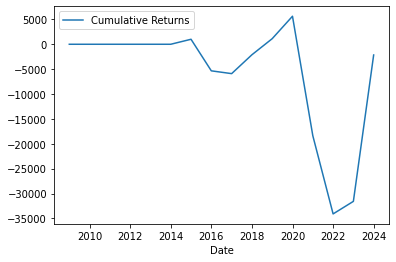

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Get historical data for BOVA11 and IVVB11 ETFs
bova11 = yf.Ticker("BOVA11.SA").history(period="max")
ivvb11 = yf.Ticker("IVVB11.SA").history(period="max")

# Calculate the difference in daily returns
diff = bova11["Close"] - ivvb11["Close"]

# Create a DataFrame with the cumulative returns for each year
cumulative_returns = diff.resample("A").sum()
cumulative_returns = pd.DataFrame(cumulative_returns)
cumulative_returns.columns = ["Cumulative Returns"]

# Plot the data using seaborn
sns.lineplot(data=cumulative_returns)

In [ ]:

# Get historical data for BOVA11 and IVVB11 ETFs
bova11 = yf.Ticker("BOVA11.SA").history(period="max")
ivvb11 = yf.Ticker("IVVB11.SA").history(period="max")

# Calculate the difference in daily returns
diff = bova11["Close"] - ivvb11["Close"]

# Create a dictionary to store the yearly dataframes
yearly_dataframes = {}

# Iterate over the years in the data
for year in diff.resample("A").sum().index.year:
    # Create a dataframe for the current year
    df = diff[diff.index.year == year]
    # Add the dataframe to the dictionary
    yearly_dataframes[year] = df
    # Print the first rows of the dataframe
    print(f"Data for year {year}:")
    print(df.head())

Data for year 2008:
Date
2008-11-28 00:00:00-02:00   NaN
2008-12-01 00:00:00-02:00   NaN
2008-12-02 00:00:00-02:00   NaN
2008-12-03 00:00:00-02:00   NaN
2008-12-04 00:00:00-02:00   NaN
Name: Close, dtype: float64
Data for year 2009:
Date
2009-01-02 00:00:00-02:00   NaN
2009-01-05 00:00:00-02:00   NaN
2009-01-06 00:00:00-02:00   NaN
2009-01-07 00:00:00-02:00   NaN
2009-01-08 00:00:00-02:00   NaN
Name: Close, dtype: float64
Data for year 2010:
Date
2010-01-04 00:00:00-02:00   NaN
2010-01-05 00:00:00-02:00   NaN
2010-01-06 00:00:00-02:00   NaN
2010-01-07 00:00:00-02:00   NaN
2010-01-08 00:00:00-02:00   NaN
Name: Close, dtype: float64
Data for year 2011:
Date
2011-01-03 00:00:00-02:00   NaN
2011-01-04 00:00:00-02:00   NaN
2011-01-05 00:00:00-02:00   NaN
2011-01-06 00:00:00-02:00   NaN
2011-01-07 00:00:00-02:00   NaN
Name: Close, dtype: float64
Data for year 2012:
Date
2012-01-02 00:00:00-02:00   NaN
2012-01-03 00:00:00-02:00   NaN
2012-01-04 00:00:00-02:00   NaN
2012-01-05 00:00:00-02:00  

In [ ]:
# Get historical data for BOVA11 and IVVB11 ETFs
bova11 = yf.Ticker("BOVA11.SA").history(period="max")
ivvb11 = yf.Ticker("IVVB11.SA").history(period="max")

# Calculate the difference in daily returns
diff = bova11["Close"] - ivvb11["Close"]

# Create a dictionary to store the yearly dataframes
yearly_dataframes = {}

# Iterate over the years in the data
for year in diff.resample("A").sum().index.year:
    # Create a dataframe for the current year
    df = diff[diff.index.year == year]
    # Add the dataframe to the dictionary
    yearly_dataframes[year] = df
    
    #Plotting the dataframe
    df.plot(title=f"Difference in daily returns for year {year}")
    plt.xlabel('Year')
    plt.ylabel('Returns')
    plt.show()

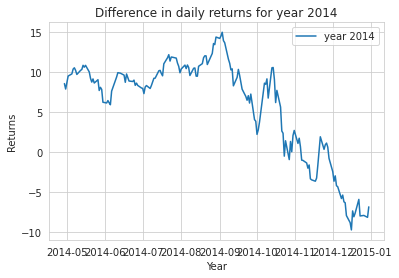

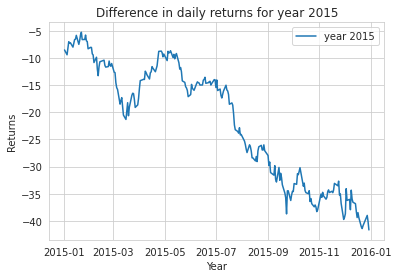

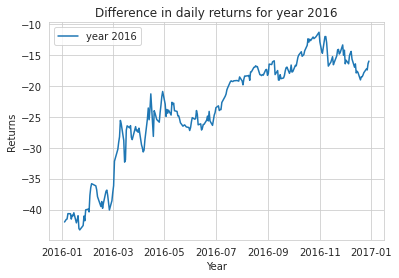

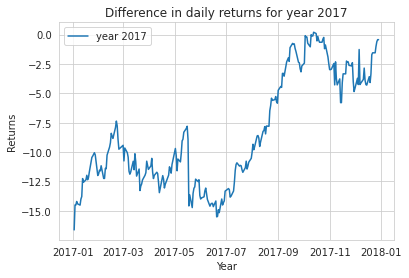

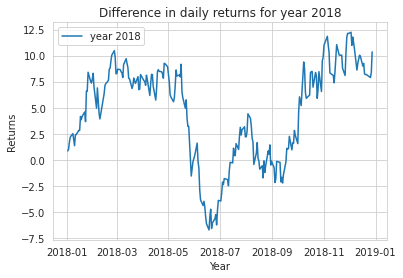

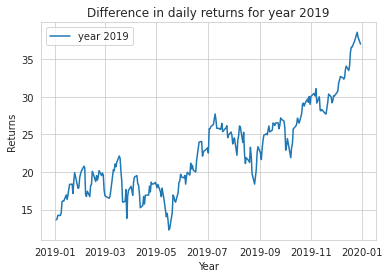

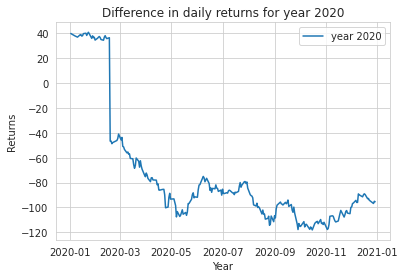

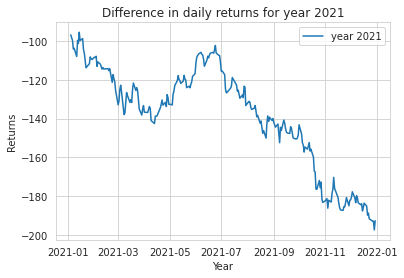

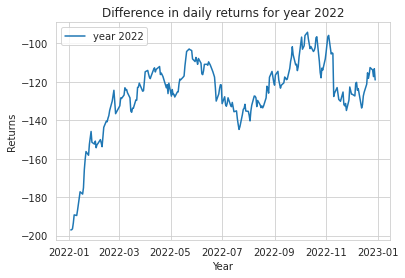

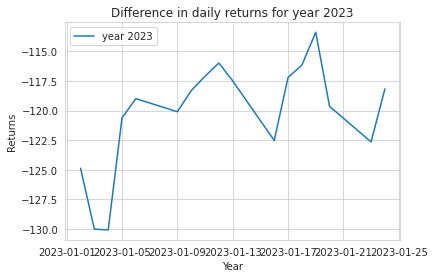

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Get historical data for BOVA11 and IVVB11 ETFs
bova11 = yf.Ticker("BOVA11.SA").history(start='2014-01-01', end='2023-01-25')
ivvb11 = yf.Ticker("IVVB11.SA").history(start='2014-01-01', end='2023-01-25')

# Calculate the difference in daily returns
diff = bova11["Close"] - ivvb11["Close"]

# Create a dictionary to store the yearly dataframes
yearly_dataframes = {}

# Iterate over the years in the data
for year in diff.resample("A").sum().index.year:
    # Create a dataframe for the current year
    df = diff[diff.index.year == year]
    # Add the dataframe to the dictionary
    yearly_dataframes[year] = df
    
    #Plotting the dataframe
    sns.set_style("whitegrid")
    sns.lineplot(data=df,label=f'year {year}')
    plt.title(f"Difference in daily returns for year {year}")
    plt.xlabel('Year')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

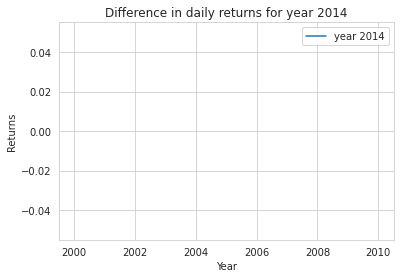

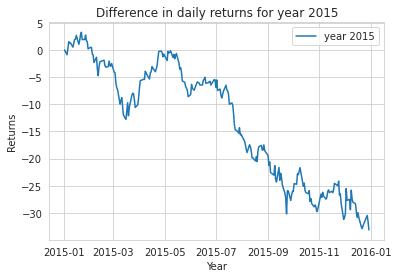

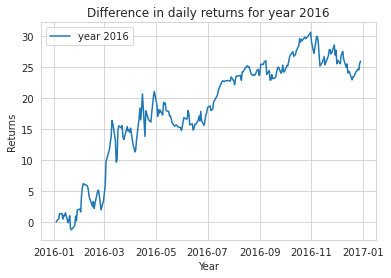

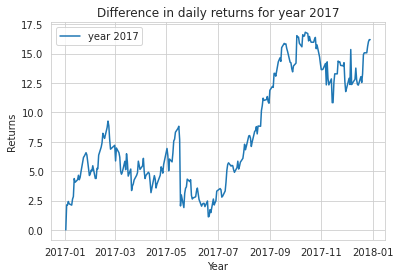

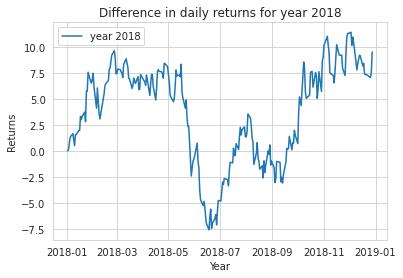

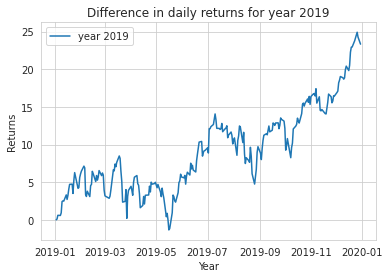

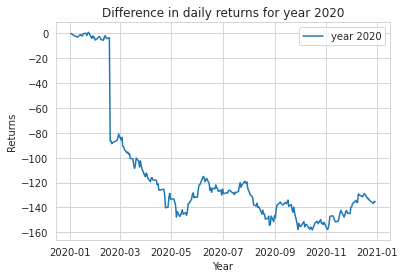

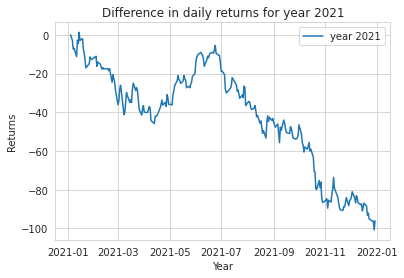

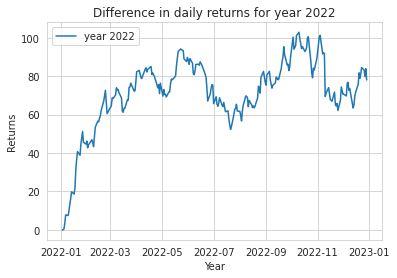

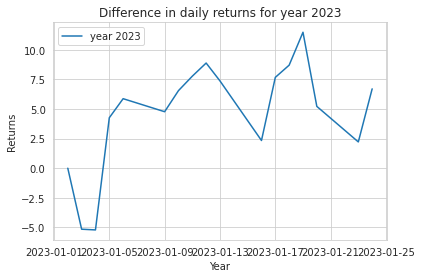

In [ ]:
bova11 = yf.Ticker("BOVA11.SA").history(start='2014-01-01', end='2023-01-25')
ivvb11 = yf.Ticker("IVVB11.SA").history(start='2014-01-01', end='2023-01-25')

# Calculate the difference in daily returns
diff = bova11["Close"] - ivvb11["Close"]

# Create a dictionary to store the yearly dataframes
yearly_dataframes = {}

# Iterate over the years in the data
for year in diff.resample("A").sum().index.year:
    # Create a dataframe for the current year
    df = diff[diff.index.year == year]
    # Add the dataframe to the dictionary
    yearly_dataframes[year] = df
    
    # Start each year from zero
    df = df - df.iloc[0]
    
    #Plotting the dataframe
    sns.set_style("whitegrid")
    sns.lineplot(data=df,label=f'year {year}')
    plt.title(f"Difference in daily returns for year {year}")
    plt.xlabel('Year')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()